# Classification Algorithms with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown here.

## Import Libraries
Let's import some libraries to get started!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# from IPython.core.interactiveshell import InteractiveShell  
# InteractiveShell.ast_node_interactivity = "all"

# # InteractiveShell.ast_node_interactivity = "last_expr"

In [4]:
# 2+3
5-6

-1

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [6]:
train = pd.read_csv(r'titanic_train.csv')

In [7]:
type(train)

pandas.core.frame.DataFrame

In [10]:
train.tail(10)

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            349257   7.8958   NaN        S  
882  female  22.0      0      0              7552  10.5167   NaN        S  
883    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q

In [8]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [12]:
train.shape

(891, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train[['Age', 'Pclass']]

Age  Pclass
0    22.0       3
1    38.0       1
2    26.0       3
3    35.0       1
4    35.0       3
..    ...     ...
886  27.0       2
887  19.0       1
888   NaN       3
889  26.0       1
890  32.0       3

[891 rows x 2 columns]

In [16]:
train[['Name', 'Pclass', 'Age', 'Sex']].head()

Name  Pclass   Age     Sex
0                            Braund, Mr. Owen Harris       3  22.0    male
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  38.0  female
2                             Heikkinen, Miss. Laina       3  26.0  female
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  35.0  female
4                           Allen, Mr. William Henry       3  35.0    male

In [21]:
train.shape

(891, 12)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train.loc[0]   #calling a single row, by its label

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [22]:
train.iloc[:5,3:6]   # row,col indexing

Name     Sex   Age
0                            Braund, Mr. Owen Harris    male  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0
2                             Heikkinen, Miss. Laina  female  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4                           Allen, Mr. William Henry    male  35.0

In [29]:
train.iloc[5:15:3, 0:10:2]   # row,col

PassengerId  Pclass     Sex  SibSp  Ticket
5             6       3    male      0  330877
8             9       3  female      0  347742
11           12       1  female      0  113783
14           15       3  female      0  350406

In [31]:
train.loc[8, 'Age']   # indexing based out of Labels

27.0

In [28]:
train[train['Age']>30]['Survived']

1      1
3      1
4      0
6      0
11     1
      ..
873    0
879    1
881    0
885    0
890    0
Name: Survived, Length: 305, dtype: int64

In [30]:
train[(train['Age']>30) & (train['Pclass'] == 1)]

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
30            31         0       1   
..           ...       ...     ...   
862          863         1       1   
867          868         0       1   
871          872         1       1   
872          873         0       1   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
30                            Uruchurtu, Don. Manuel E    male  40.0      0   
..                                                 ...     ...   ...    ...   
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  female  48.0      0   
867               Roebling, Mr. Washington Augustus II    male  31.0      0   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
11       0    113783  26.5500         C103        S  
30       0  PC 17601  27.7208          NaN        C  
..     ...       ...      ...          ...      ...  
862      0     17466  25.9292          D17        S  
867      0  PC 17590  50.4958          A24        S  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  

[125 rows x 12 columns]

In [38]:
train[train['Pclass'] == 1]

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
11       0    113783  26.5500         C103        S  
23       0    113788  35.5000           A6        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[216 rows x 12 columns]

In [31]:
train[(train['Age'] < 30) & (train['Pclass'] == 1)]

PassengerId  Survived  Pclass  \
23            24         1       1   
27            28         0       1   
34            35         0       1   
83            84         0       1   
88            89         1       1   
97            98         1       1   
102          103         0       1   
118          119         0       1   
136          137         1       1   
139          140         0       1   
151          152         1       1   
290          291         1       1   
291          292         1       1   
297          298         0       1   
305          306         1       1   
307          308         1       1   
310          311         1       1   
311          312         1       1   
329          330         1       1   
336          337         0       1   
341          342         1       1   
356          357         1       1   
369          370         1       1   
370          371         1       1   
373          374         0       1   
377          378         0       1   
393          394         1       1   
430          431         1       1   
435          436         1       1   
445          446         1       1   
484          485         1       1   
498          499         0       1   
504          505         1       1   
505          506         0       1   
539          540         1       1   
550          551         1       1   
585          586         1       1   
607          608         1       1   
627          628         1       1   
641          642         1       1   
681          682         1       1   
689          690         1       1   
700          701         1       1   
708          709         1       1   
710          711         1       1   
724          725         1       1   
730          731         1       1   
742          743         1       1   
748          749         0       1   
781          782         1       1   
782          783         0       1   
802          803         1       1   
853          854         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex    Age  SibSp  \
23                        Sloper, Mr. William Thompson    male  28.00      0   
27                      Fortune, Mr. Charles Alexander    male  19.00      3   
34                             Meyer, Mr. Edgar Joseph    male  28.00      1   
83                             Carrau, Mr. Francisco M    male  28.00      0   
88                          Fortune, Miss. Mabel Helen  female  23.00      3   
97                     Greenfield, Mr. William Bertram    male  23.00      0   
102                          White, Mr. Richard Frasar    male  21.00      0   
118                           Baxter, Mr. Quigg Edmond    male  24.00      0   
136                       Newsom, Miss. Helen Monypeny  female  19.00      0   
139                                 Giglio, Mr. Victor    male  24.00      0   
151                  Pears, Mrs. Thomas (Edith Wearne)  female  22.00      1   
290                       Barber, Miss. Ellen "Nellie"  female  26.00      0   
291            Bishop, Mrs. Dickinson H (Helen Walton)  female  19.00      1   
297                       Allison, Miss. Helen Loraine  female   2.00      1   
305                     Allison, Master. Hudson Trevor    male   0.92      1   
307  Penasco y Castellana, Mrs. Victor de Satode (M...  female  17.00      1   
310                     Hays, Miss. Margaret Bechstein  female  24.00      0   
311                         Ryerson, Miss. Emily Borie  female  18.00      2   
329                       Hippach, Miss. Jean Gertrude  female  16.00      0   
336                          Pears, Mr. Thomas Clinton    male  29.00      1   
341                     Fortune, Miss. Alice Elizabeth  female  24.00      3   
356                        Bowerman, Miss. Elsie Edith  female  22.00      0   
369                      Aubart, Mme

In [35]:
train[train['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [44]:
train[train['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [45]:
train[train['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [5]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [39]:
# !pip install pandas-profiling   

In [63]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(train)
profile

In [64]:
profile.to_file(output_file="Titanic data profiling.html")

In [7]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

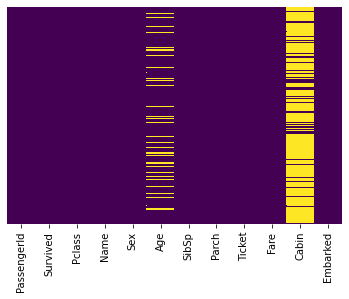

In [38]:
sns.heatmap(train.isnull(), yticklabels=False,\
            cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0".

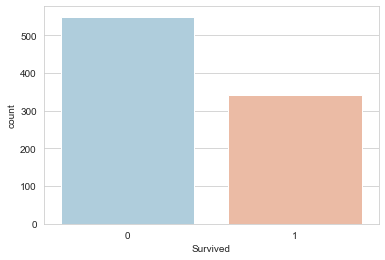

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, palette='RdBu_r')

In [43]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [44]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

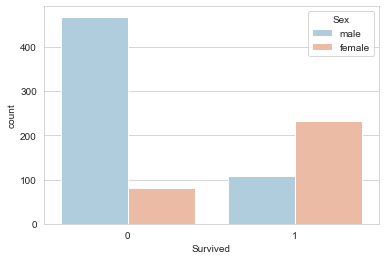

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

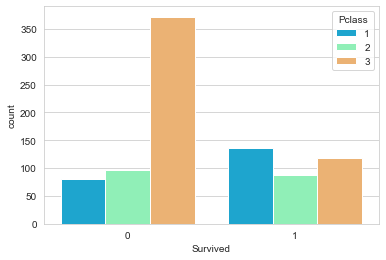

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train, palette='rainbow')

<AxesSubplot:xlabel='Age'>

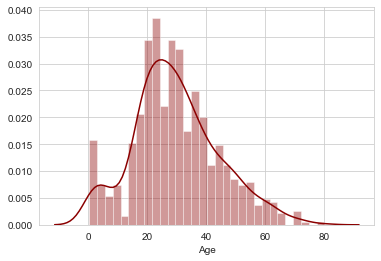

In [49]:
sns.distplot(train['Age'],kde=True, color='darkred',bins=30)

<AxesSubplot:>

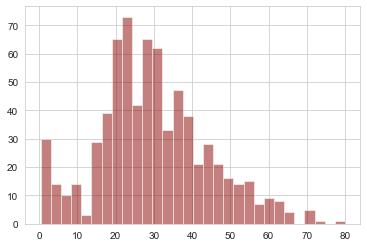

In [53]:
train['Age'].hist(bins=30,color='darkred',alpha=0.5)

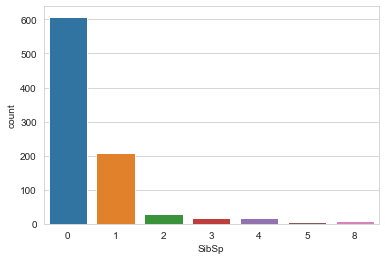

In [16]:
sns.countplot(x='SibSp',data=train)

In [55]:
train['Sex'].unique() 

array(['male', 'female'], dtype=object)

In [57]:
train['Sex'].nunique() 

2

In [58]:
train['Sex'].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

In [59]:
train['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [66]:
train[train['Fare'] >200]

PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   

                                                Name     Sex   Age  SibSp  \
27                    Fortune, Mr. Charles Alexander    male  19.0      3   
88                        Fortune, Miss. Mabel Helen  female  23.0      3   
118                         Baxter, Mr. Quigg Edmond    male  24.0      0   
258                                 Ward, Miss. Anna  female  35.0      0   
299  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0      0   

     Parch    Ticket      Fare        Cabin Embarked  
27       2     19950  263.0000  C23 C25 C27        S  
88       2     19950  263.0000  C23 C25 C27        S  
118      1  PC 17558  247.5208      B58 B60        C  
258      0  PC 17755  512.3292          NaN        C  
299      1  PC 17558  247.5208      B58 B60        C

<AxesSubplot:>

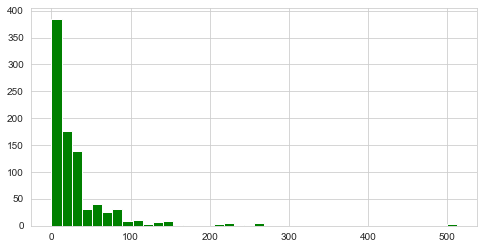

In [60]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [18]:
# !pip install cufflinks

In [61]:
import cufflinks as cf
cf.go_offline()

In [62]:
train['Fare'].iplot(kind='hist',bins=30,color='green')
plt.show()

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


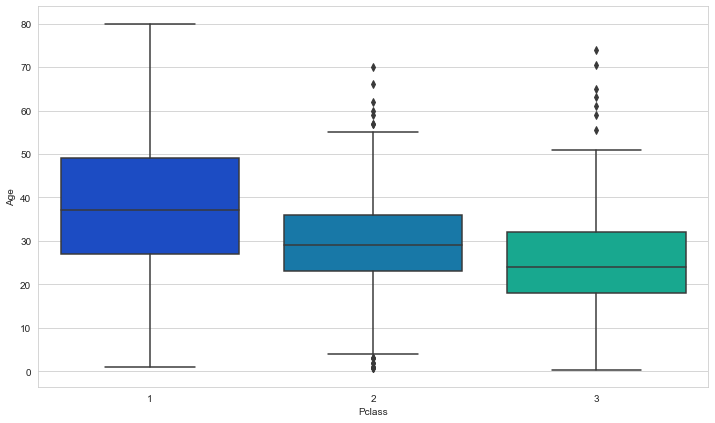

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [69]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [12]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [14]:
train[train['Pclass']==1]['Age'].mean()
train[train['Pclass']==2]['Age'].mean()
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [67]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38.23

        elif Pclass == 2:
            return 29.87

        else:
            return 25.140

    else:
        return Age

Now apply that function!

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [70]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.232963
2    29.877174
3    25.140448
Name: Age, dtype: float64

In [20]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [74]:
age_mean = train.groupby('Pclass')['Age'].mean()
age_mean

Pclass
1    38.232963
2    29.877174
3    25.140448
Name: Age, dtype: float64

pandas.core.groupby.generic.DataFrameGroupBy

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now let's check that heat map again!

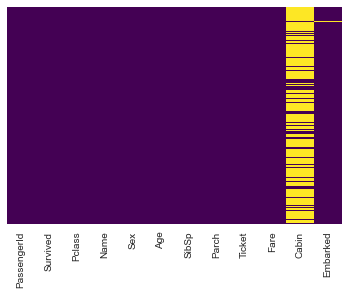

In [72]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [83]:
train.info()
# pandas_profiling.ProfileReport(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [74]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [75]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [76]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
train.head(2)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C

In [84]:
train.dropna(inplace=True, axis=0)   #those 2 rows where Embarked was missiing, will be dropped

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [38]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
#sex = pd.get_dummies(train['Sex'],drop_first=False)
embark = pd.get_dummies(train['Embarked'],drop_first=True)  # ONE-HOT ENCODING

In [40]:
embark

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]

In [42]:
embark.shape

(889, 2)

In [78]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()

In [79]:
LE_sex.fit(train['Sex'])  # learns the unique valuues present in the categorical variable col

LabelEncoder()

In [80]:
LE_sex.classes_

array(['female', 'male'], dtype=object)

In [81]:
train['Sex'] = LE_sex.transform(train['Sex'])

In [82]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    0  38.0      1      0  71.2833        C
2         1       3    0  26.0      0      0   7.9250        S
3         1       1    0  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

In [95]:
# train['Sex'] = LE_sex.fit_transform(train['Sex'])

In [83]:
train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB


In [87]:
train.dropna(inplace=True)

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 59.0+ KB


In [89]:
LE_embark = LabelEncoder()
train['Embarked'] = LE_embark.fit_transform(train['Embarked'])

In [90]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [91]:
LE_embark.classes_

array(['C', 'Q', 'S'], dtype=object)

In [6]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [5]:
train.to_csv('titanic-clean.csv')

In [7]:
train.to_pickle('titanic-clean.pkl')

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [8]:
import pandas as pd

In [9]:
train = pd.read_pickle('titanic-clean.pkl')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = train.drop('Survived', axis=1)
# X = train.values
Y = train['Survived']

In [13]:
X.shape

(889, 7)

In [14]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, \
                                                    test_size=0.30, 
                                                    random_state=101)

In [16]:
X_train.shape

(622, 7)

In [17]:
y_train.shape

(622,)

In [18]:
X_test.shape

(267, 7)

In [19]:
y_test.shape

(267,)

## Training and Predicting

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression(solver='liblinear') # , class_weight='balanced'
logmodel

LogisticRegression(solver='liblinear')

In [22]:
lm = logmodel.fit(X_train,y_train) # this is the ACTUAL MODEL TRAINING STEP
lm

LogisticRegression(solver='liblinear')

In [23]:
lm.n_iter_

array([11], dtype=int32)

In [24]:
lm.classes_

array([0, 1], dtype=int64)

In [25]:
lm.coef_

array([[-0.77868949, -2.32849129, -0.02614241, -0.21811041, -0.09000133,
         0.00466202, -0.09737128]])

In [26]:
lm.intercept_

array([3.53769862])

In [27]:
predictions = lm.predict(X_test)

In [28]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [29]:
prob = lm.predict_proba(X_test)

In [30]:
prob

array([[0.87449431, 0.12550569],
       [0.86357692, 0.13642308],
       [0.25672185, 0.74327815],
       [0.0899528 , 0.9100472 ],
       [0.85926412, 0.14073588],
       [0.93905936, 0.06094064],
       [0.8475405 , 0.1524595 ],
       [0.78015681, 0.21984319],
       [0.90016497, 0.09983503],
       [0.42526674, 0.57473326],
       [0.25694445, 0.74305555],
       [0.07807417, 0.92192583],
       [0.87457319, 0.12542681],
       [0.41568004, 0.58431996],
       [0.87375051, 0.12624949],
       [0.85910008, 0.14089992],
       [0.09265778, 0.90734222],
       [0.18330878, 0.81669122],
       [0.4414567 , 0.5585433 ],
       [0.87981067, 0.12018933],
       [0.87418058, 0.12581942],
       [0.89127675, 0.10872325],
       [0.629611  , 0.370389  ],
       [0.67928618, 0.32071382],
       [0.93142525, 0.06857475],
       [0.60840848, 0.39159152],
       [0.45702341, 0.54297659],
       [0.49203788, 0.50796212],
       [0.88287781, 0.11712219],
       [0.72922002, 0.27077998],
       [0.

In [31]:
prob_1 = prob[:,1]

In [32]:
thresh = 0.8
pred = []
for probab in prob_1:
    if probab >= thresh:
        pred.append(1)
    else:
        pred.append(0)
        

In [33]:
pred

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [34]:
y_test[:10]

511    0
613    0
615    1
337    1
718    0
152    0
826    0
418    0
614    0
241    1
Name: Survived, dtype: int64

In [35]:
predictions[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [36]:
from sklearn.metrics import classification_report

In [134]:
(0.85*163 + 0.72*101)/267

0.7912734082397003

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.65      0.72       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [130]:
(147+68)/267

0.8052434456928839

In [133]:
np.round((147)/(147+36), 2)
np.round((68)/(68+16), 2)

0.81

In [38]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,predictions)
print(matrix)

[[147  16]
 [ 36  68]]


In [39]:
lm.score(X_test, y_test) #this is the accuracy score

0.8052434456928839

In [102]:
predictions[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [103]:
type(predictions)

numpy.ndarray

In [40]:
df = pd.DataFrame(y_test)
df['Predicted'] = predictions

In [41]:
df.tail()

Survived  Predicted
792         0          0
828         1          0
732         0          0
669         1          1
634         0          1

In [106]:
logmodel.predict_proba(X_test[:5]) 

array([[0.87228569, 0.12771431],
       [0.85301938, 0.14698062],
       [0.24700667, 0.75299333],
       [0.09146954, 0.90853046],
       [0.84294839, 0.15705161]])

In [42]:
df1 = pd.DataFrame(logmodel.coef_, columns=X.columns)
df1

Pclass       Sex       Age    SibSp     Parch      Fare  Embarked
0 -0.778689 -2.328491 -0.026142 -0.21811 -0.090001  0.004662 -0.097371

In [108]:
logmodel.intercept_

array([3.39982948])

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?


In [109]:
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier()

In [110]:
SGD_clf.fit(X_train, y_train)  # default loss='hinge'

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [138]:
predictions = logmodel.predict(X_test)
SGD_clf.score(X_test, y_test)

NameError: name 'SGD_clf' is not defined

In [44]:
# Load libraries
# import pandas
# import numpy
# import matplotlib.pyplot as plt
# from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
import warnings
warnings.simplefilter("ignore")

In [46]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [47]:
from sklearn.model_selection import KFold, cross_val_score
results = []
names = []
# n_splits = 5
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, \
                                  random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, \
                                                 y_train, cv=kfold, \
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)

LR: 79.74 ( 1.41)
LDA: 79.09 ( 1.51)
KNN: 69.61 ( 2.99)
CART: 76.21 ( 4.29)
NB: 77.65 ( 2.49)
SVM: 68.49 ( 2.50)


In [48]:
results

[array([0.816     , 0.792     , 0.7983871 , 0.80645161, 0.77419355]),
 array([0.816     , 0.8       , 0.78225806, 0.78225806, 0.77419355]),
 array([0.696     , 0.696     , 0.75      , 0.66129032, 0.67741935]),
 array([0.808     , 0.688     , 0.74193548, 0.79032258, 0.78225806]),
 array([0.792     , 0.776     , 0.81451613, 0.75      , 0.75      ]),
 array([0.656     , 0.712     , 0.65322581, 0.7016129 , 0.7016129 ])]

In [49]:
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())

In [50]:
# results_df.drop(['CV Mean', 'CV Std Dev'], inplace=True, axis = 1)
results_df

CV1    CV2       CV3       CV4       CV5
LR    0.816  0.792  0.798387  0.806452  0.774194
LDA   0.816  0.800  0.782258  0.782258  0.774194
KNN   0.696  0.696  0.750000  0.661290  0.677419
CART  0.808  0.688  0.741935  0.790323  0.782258
NB    0.792  0.776  0.814516  0.750000  0.750000
SVM   0.656  0.712  0.653226  0.701613  0.701613

In [51]:
n_splits = 5
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)

In [52]:
pd.set_option('precision',1)
results_df*100

CV1   CV2   CV3   CV4   CV5  CV Mean  CV Std Dev
LR    81.6  79.2  79.8  80.6  77.4     79.7         1.6
LDA   81.6  80.0  78.2  78.2  77.4     79.1         1.7
KNN   69.6  69.6  75.0  66.1  67.7     69.6         3.3
CART  80.8  68.8  74.2  79.0  78.2     76.2         4.8
NB    79.2  77.6  81.5  75.0  75.0     77.7         2.8
SVM   65.6  71.2  65.3  70.2  70.2     68.5         2.8

In [53]:
results_df.sort_values(by='CV Mean', ascending=False)*100

CV1   CV2   CV3   CV4   CV5  CV Mean  CV Std Dev
LR    81.6  79.2  79.8  80.6  77.4     79.7         1.6
LDA   81.6  80.0  78.2  78.2  77.4     79.1         1.7
NB    79.2  77.6  81.5  75.0  75.0     77.7         2.8
CART  80.8  68.8  74.2  79.0  78.2     76.2         4.8
KNN   69.6  69.6  75.0  66.1  67.7     69.6         3.3
SVM   65.6  71.2  65.3  70.2  70.2     68.5         2.8

In [128]:
# InteractiveShell.ast_node_interactivity = "last_expr"

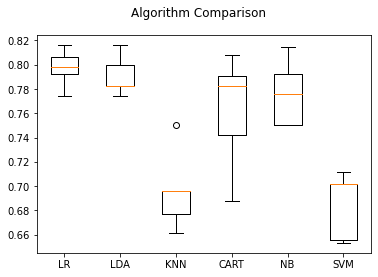

In [55]:
# %matplotlib inline
# Compare Algorithms
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

CV1   CV2   CV3   CV4   CV5  CV Mean  CV Std Dev
ScaledSVM   82.4  84.0  77.4  79.0  79.8     80.5         2.6
ScaledKNN   81.6  80.8  77.4  81.5  79.8     80.2         1.7
ScaledLR    81.6  79.2  79.8  79.8  77.4     79.6         1.5
ScaledLDA   81.6  80.0  78.2  78.2  77.4     79.1         1.7
ScaledNB    79.2  77.6  81.5  75.0  75.0     77.7         2.8
ScaledCART  80.8  71.2  72.6  79.0  75.8     75.9         4.1

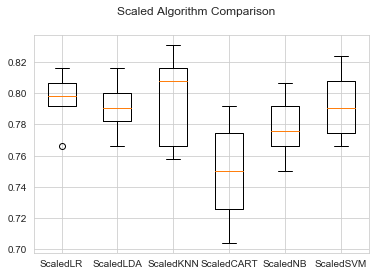

In [131]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNearestClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())]))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

SyntaxError: invalid syntax (<ipython-input-33-609ea6fb8b1f>, line 7)

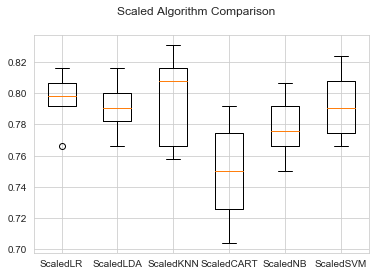

In [134]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [155]:
xgboot, LightGBM, CatBoost

NameError: name 'xgboot' is not defined

In [156]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))  
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

CV1   CV2   CV3   CV4   CV5  CV Mean  CV Std Dev
ScaledGBM  80.0  79.2  78.2  86.3  82.3     81.2         3.2
ScaledRF   84.8  75.2  79.8  85.5  79.8     81.0         4.2
ScaledET   84.0  74.4  75.8  82.3  77.4     78.8         4.2
ScaledAB   80.8  77.6  77.4  79.8  78.2     78.8         1.5

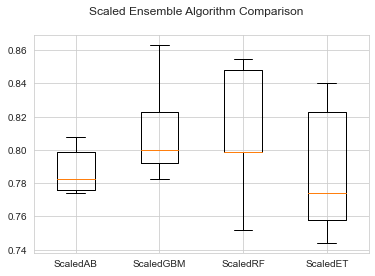

In [157]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [158]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21,25,30,35,40,50]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier('euclidean')

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, \
                    scoring='accuracy', cv=kfold, )

grid_result = grid.fit(rescaledX, y_train)

In [159]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.808697 using {'n_neighbors': 7}


In [160]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.758787 (0.026830) with: {'n_neighbors': 1}
0.781303 (0.017753) with: {'n_neighbors': 3}
0.800594 (0.018448) with: {'n_neighbors': 5}
0.808697 (0.012643) with: {'n_neighbors': 7}
0.800619 (0.025872) with: {'n_neighbors': 9}
0.797394 (0.016034) with: {'n_neighbors': 11}
0.794194 (0.012334) with: {'n_neighbors': 13}
0.790994 (0.007231) with: {'n_neighbors': 15}
0.787755 (0.012481) with: {'n_neighbors': 17}
0.789342 (0.013577) with: {'n_neighbors': 19}
0.784542 (0.014192) with: {'n_neighbors': 21}
0.778155 (0.009102) with: {'n_neighbors': 25}
0.774903 (0.015428) with: {'n_neighbors': 30}
0.779716 (0.011410) with: {'n_neighbors': 35}
0.787729 (0.019930) with: {'n_neighbors': 40}
0.787729 (0.019266) with: {'n_neighbors': 50}


In [38]:
model = KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [39]:
model.fit( rescaledX, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [142]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
degree_values = [2,3,4,5]
gamma_values =[0.1, 0.5, 1, 2]
param_grid = dict(C=c_values, kernel=kernel_values, degree=degree_values, \
                 gamma = gamma_values)
model = SVC()

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, \
                    scoring='accuracy', cv=kfold, )

In [3]:
import numpy as np
import pandas as pd

In [15]:
x = np.arange(0.2, 1.2, 0.025).round(4)
x

array([0.2  , 0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  ,
       0.425, 0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625,
       0.65 , 0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 ,
       0.875, 0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075,
       1.1  , 1.125, 1.15 , 1.175])

In [16]:
y1 = 2*x**2 - 3*x + 1
y2 = y1.copy()*2

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
y1.argmin()

22

In [19]:
y2.argmin()

22

In [20]:
x[y1.argmin()]

0.75

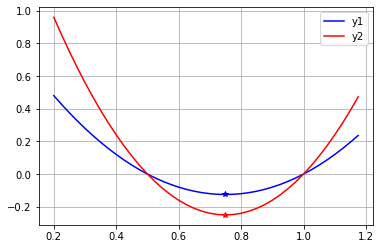

In [21]:
plt.plot(x,y1, 'b-')
plt.plot(x,y2, 'r-')
plt.plot(x[y1.argmin()],y1.min(), 'b*')
plt.plot(x[y2.argmin()],y2.min(), 'r*')
plt.legend(['y1', 'y2'])
plt.grid(True)

In [22]:
from scipy.optimize import minimize

In [23]:
f = lambda x: 2*x[0]**2 - 3*x[0] + 1

In [26]:
sol = minimize(f,[1], method='Nelder-Mead', tol=1e-3)
sol

 final_simplex: (array([[0.75      ],
       [0.74921875]]), array([-0.125     , -0.12499878]))
           fun: -0.12499999999999978
       message: 'Optimization terminated successfully.'
          nfev: 20
           nit: 10
        status: 0
       success: True
             x: array([0.75])

In [28]:
sol.x

array([0.75])

In [29]:
f = lambda x: 20*x[0]**2 - 30*x[0] + 10

In [30]:
sol = minimize(f,[0.6], method='Nelder-Mead', tol=1e-3)
sol

 final_simplex: (array([[0.75     ],
       [0.7490625]]), array([-1.25      , -1.24998242]))
           fun: -1.25
       message: 'Optimization terminated successfully.'
          nfev: 18
           nit: 9
        status: 0
       success: True
             x: array([0.75])

In [31]:
sol.x

array([0.75])

In [79]:
X = np.array([1,3,5])
Y = np.array([4.8,11.4,17.5])

In [85]:
W1 = ( (X*Y).mean() - X.mean()*Y.mean()) / ( (X**2).mean() - (X.mean())**2 )
W1

3.174999999999999

In [88]:
W0 = Y.mean() - (W1*X.mean())
W0

1.7083333333333375

In [89]:
Y_pred = W0 + W1*X
Y_pred

array([ 4.88333333, 11.23333333, 17.58333333])

In [94]:
np.cov(X,Y) / np.var(X)

array([[ 1.5    ,  4.7625 ],
       [ 4.7625 , 15.12875]])

In [96]:
X = np.array([[1, 1],[1,3],[1,5]])
X

array([[1, 1],
       [1, 3],
       [1, 5]])

In [102]:
Y = np.array([4.8,11.4,17.5]).reshape(-1,1)
Y

array([[ 4.8],
       [11.4],
       [17.5]])

In [104]:
np.linalg.inv(X.T.dot(X))

array([[ 1.45833333, -0.375     ],
       [-0.375     ,  0.125     ]])

In [105]:
np.linalg.inv(X.T.dot(X)).dot(X.T)

array([[ 1.08333333,  0.33333333, -0.41666667],
       [-0.25      ,  0.        ,  0.25      ]])

In [106]:
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
W

array([[1.70833333],
       [3.175     ]])

In [107]:
W = np.array([3.37, 12.65]).reshape(-1,1)
W

array([[ 3.37],
       [12.65]])

In [113]:
Y_pred = X.dot(W).reshape(-1,1)

In [114]:
Y_pred

array([[16.02],
       [41.32],
       [66.62]])

In [115]:
error = Y_pred - Y
error

array([[11.22],
       [29.92],
       [49.12]])

In [116]:
error.sum()

90.26

In [126]:
(error*(X[:,1].reshape(-1,1))).sum()

346.58000000000004

In [63]:
(1.428 + (3.324*5) - 17.5)*5

2.7399999999999913

In [68]:
L = 0.548**2
L

0.30030400000000007

In [66]:
3.324 - (0.1*(2.74)) 

3.05

In [231]:
X = np.array([[1, 1],[1,3],[1,5]])
Y = np.array([4.8,11.4,17.5])
# W = np.array([1.7, 3.1])
W = np.array([0,0])

In [227]:
Y_pred = (X*W).sum(axis=1)
Y_pred

array([0, 0, 0])

In [228]:
error_X = (Y_pred - Y).dot(X)
error_X

array([ -33.7, -126.5])

In [229]:
L = (1/X.shape[0])*(Y_pred - Y).T.dot(Y_pred - Y)
L

153.08333333333331

In [232]:
alpha = 0.1
W = W - (alpha*error_X)
W

array([ 3.37, 12.65])

In [233]:
Y_pred = (X*W).sum(axis=1)
Y_pred

array([16.02, 41.32, 66.62])

## Batch Gradient Descent Code

In [34]:
import numpy as np
X = np.array([[1, 1],[1,3],[1,5]])
Y = np.array([4.8,11.4,17.5])

In [39]:
X

array([[1, 1],
       [1, 3],
       [1, 5]])

[0 0]


In [49]:
# W = np.array([0,0])
W = np.random.rand(2)
print(W)
n_iter = 200; alpha = 0.05; tol_L = 1e-4
L = np.ones(n_iter)*np.nan
w0 = np.ones(n_iter)*np.nan; w1 = np.ones(n_iter)*np.nan

for i in range(0,n_iter):
    Y_pred = (X*W).sum(axis=1)
    error_X = (Y_pred - Y).dot(X)
    L[i] = (1/X.shape[0])*(Y_pred - Y).T.dot(Y_pred - Y)
    W = W - (alpha*error_X)
    w0[i] = W[0]; w1[i] = W[1]
    
    if i%5==0:
        print(i,W, L[i])
#     print(i,W, L[i], '\n')
    
    if (i>1) and (L[i-1]-L[i]) < tol_L:
        print('Gradient Descent has converged !!')
        break

[0.57044539 0.66405218]
0 [1.8710551  5.57026044] 92.0084289781412
5 [1.04471352 2.14848928] 22.338274346531676
10 [1.53946661 3.81025193] 5.441959998307281
15 [1.37051249 2.97249225] 1.3413357570069522
20 [1.51710583 3.36837265] 0.3440121023175518
25 [1.49878249 3.15934481] 0.0999159717131736
30 [1.55354796 3.25028169] 0.039069719950788145
35 [1.56543675 3.19532913] 0.02311394646671529
40 [1.59258473 3.21374141] 0.018376579322633303
45 [1.60724887 3.19733295] 0.01660101015011089
50 [1.62383772 3.19917521] 0.015718145826504024
Gradient Descent has converged !!


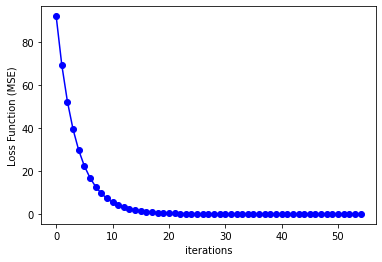

In [51]:
import matplotlib.pyplot as plt
plt.plot(L, 'b-o')
plt.xlabel('iterations'); plt.ylabel('Loss Function (MSE)'); plt.show()

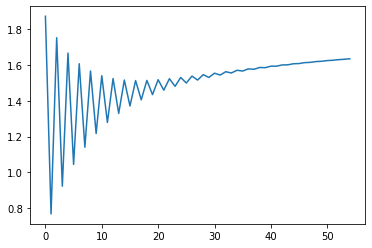

In [52]:
plt.plot(w0)

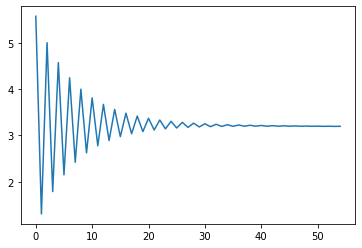

In [53]:
plt.plot(w1)